# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


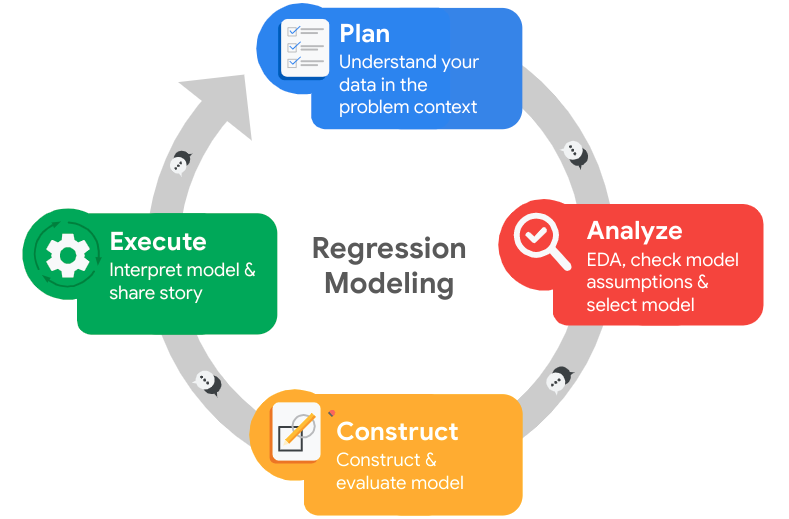

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Stakeholders: HR department being the requestor; also employee themselves as originator of survey data and because will likely be affected by HR measures after project
Problem: provide a reliable model that can support HR initiative for employee retention
Ethics: yes as results will be used by HR to make initiatives towards employees, will need to consider not to elicit retaliation mechanism

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include="all")

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

In [5]:
df0["Department"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [6]:
df0["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})
# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [11]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [12]:
df0[df0.duplicated()]["left"].value_counts()

1    1580
0    1428
Name: left, dtype: int64

In [13]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###

df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


### Check outliers

Check for outliers in the data.

Text(0.5, 1.0, 'Tenure distribution')

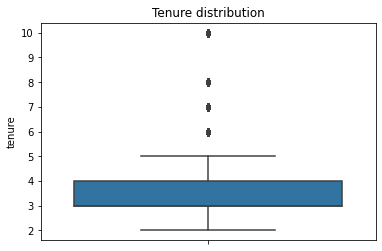

In [15]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

sns.boxplot(y=df1["tenure"],
           showfliers=True)
plt.title("Tenure distribution")

In [16]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

#Finding outliers
percentile25 = df1["tenure"].quantile(0.25)
percentile75 = df1["tenure"].quantile(0.75)
iqr=percentile75 - percentile25
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr


df1[df1["tenure"]>upper_limit]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


In [17]:
df1[df1["tenure"]<lower_limit]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [18]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1["left"].value_counts())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print("")
print(df1["left"].value_counts(normalize=True)*100)

0    10000
1     1991
Name: left, dtype: int64

0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [20]:
df1.describe(include="all")

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991,11991
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3239,5740
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,NaN,NaN
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


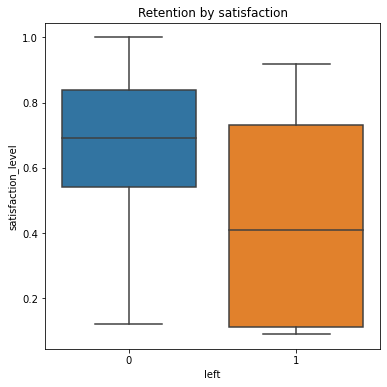

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(6,6))
plt.title("Retention by satisfaction")
sns.boxplot(x=df1["left"],
            y=df1["satisfaction_level"],
           showfliers=True)


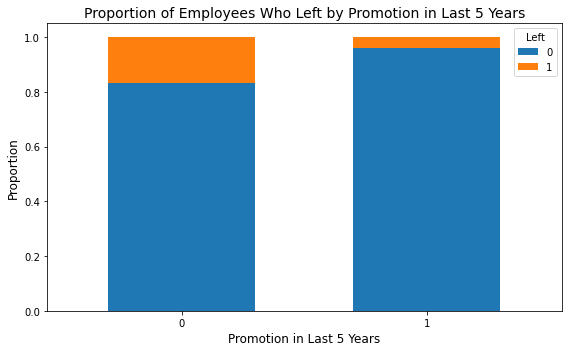

In [22]:
# Proportion of left based on promotion_last_5years
promotion_df = df1.groupby('promotion_last_5years')['left'].value_counts(normalize=True).unstack()
promotion_df = promotion_df.fillna(0)  # Handle missing values

fig, ax = plt.subplots(figsize=(8, 5))
promotion_df.plot(kind='bar', stacked=True, ax=ax, width=0.6)
ax.set_title('Proportion of Employees Who Left by Promotion in Last 5 Years', fontsize=14)
ax.set_xlabel('Promotion in Last 5 Years', fontsize=12)
ax.set_ylabel('Proportion', fontsize=12)
ax.legend(title='Left', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [23]:
accident_df=df1.groupby("work_accident")["left"].value_counts(normalize=True).unstack()
accident_df

left,0,1
work_accident,,
0,0.814022,0.185978
1,0.943243,0.056757


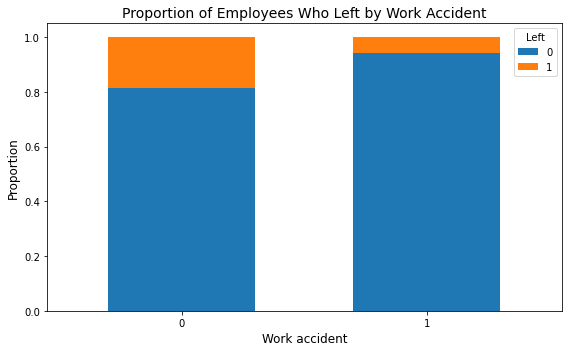

In [24]:
fig, ax = plt.subplots(figsize=(8, 5))
accident_df.plot(kind='bar', stacked=True, ax=ax, width=0.6)
ax.set_title('Proportion of Employees Who Left by Work Accident', fontsize=14)
ax.set_xlabel('Work accident', fontsize=12)
ax.set_ylabel('Proportion', fontsize=12)
ax.legend(title='Left', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

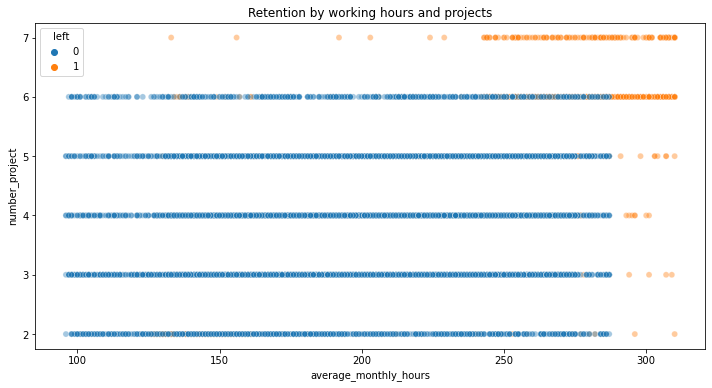

In [25]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(12,6))
plt.title("Retention by working hours and projects")
sns.scatterplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', alpha=0.4)

In [26]:
# Create a plot as needed
### YOUR CODE HERE ###
proportion_df = df1.groupby(['tenure', 'salary'])['left'].value_counts(normalize=True).unstack()
proportion_df

left                  0         1
tenure salary                    
2      high    1.000000       NaN
       low     0.991266  0.008734
       medium  0.985133  0.014867
3      high    0.945107  0.054893
       low     0.791187  0.208813
       medium  0.855684  0.144316
4      high    0.926667  0.073333
       low     0.699797  0.300203
       medium  0.783659  0.216341
5      high    0.754386  0.245614
       low     0.503636  0.496364
       medium  0.571429  0.428571
6      high    1.000000       NaN
       low     0.714894  0.285106
       medium  0.839080  0.160920
7      high    1.000000       NaN
       low     1.000000       NaN
       medium  1.000000       NaN
8      high    1.000000       NaN
       low     1.000000       NaN
       medium  1.000000       NaN
10     high    1.000000       NaN
       low     1.000000       NaN
       medium  1.000000       NaN

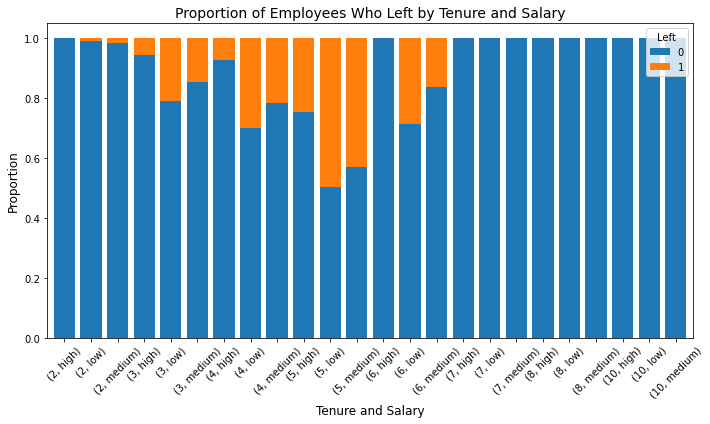

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
proportion_df.plot(kind='bar', stacked=True, ax=ax, width=0.8)
ax.set_title('Proportion of Employees Who Left by Tenure and Salary', fontsize=14)
ax.set_xlabel('Tenure and Salary', fontsize=12)
ax.set_ylabel('Proportion', fontsize=12)
ax.legend(title='Left', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

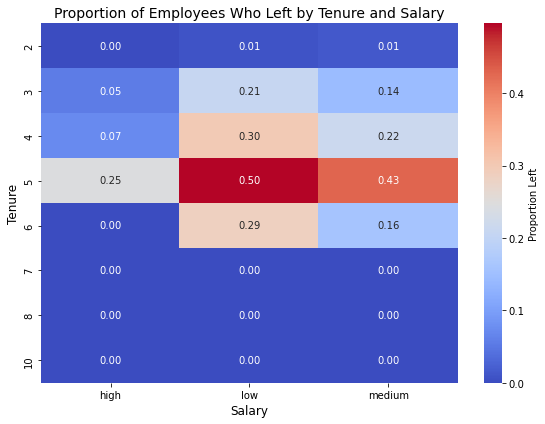

In [28]:
# Create a plot as needed
### YOUR CODE HERE ###
heatmap_data = df1.groupby(['tenure', 'salary'])['left'].mean().unstack()

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Proportion Left'})
plt.title('Proportion of Employees Who Left by Tenure and Salary', fontsize=14)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Tenure', fontsize=12)
plt.tight_layout()
plt.show()

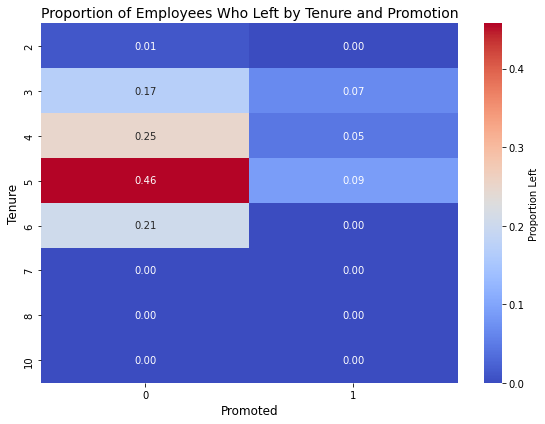

In [196]:

heatmap_data = df1.groupby(['tenure', 'promotion_last_5years'])['left'].mean().unstack()

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Proportion Left'})
plt.title('Proportion of Employees Who Left by Tenure and Promotion', fontsize=14)
plt.xlabel('Promoted', fontsize=12)
plt.ylabel('Tenure', fontsize=12)
plt.tight_layout()
plt.show()

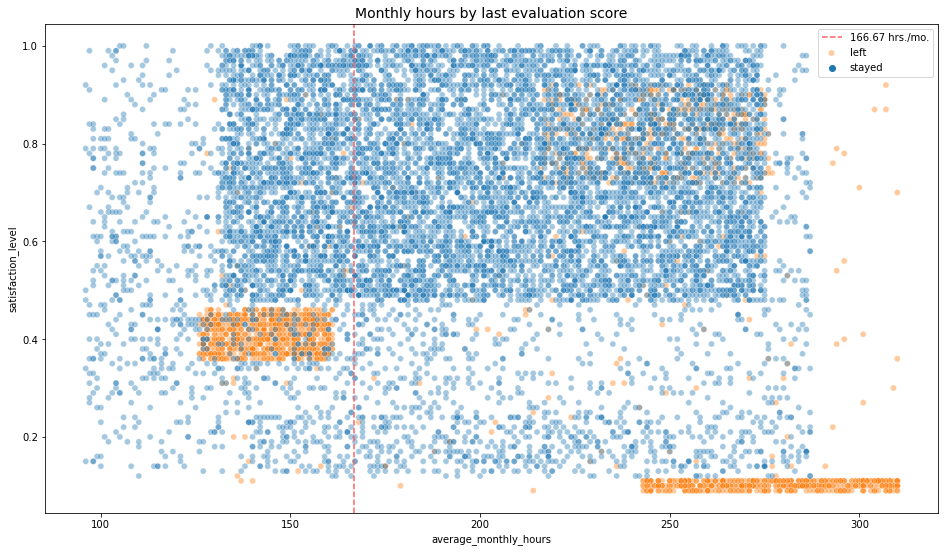

In [29]:
# Create a plot as needed
### YOUR CODE HERE ###
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

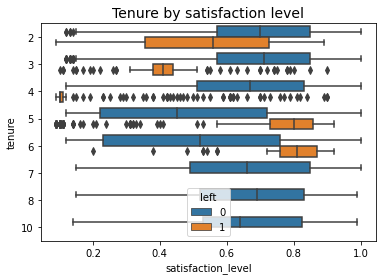

In [30]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h")
plt.title('Tenure by satisfaction level', fontsize='14');

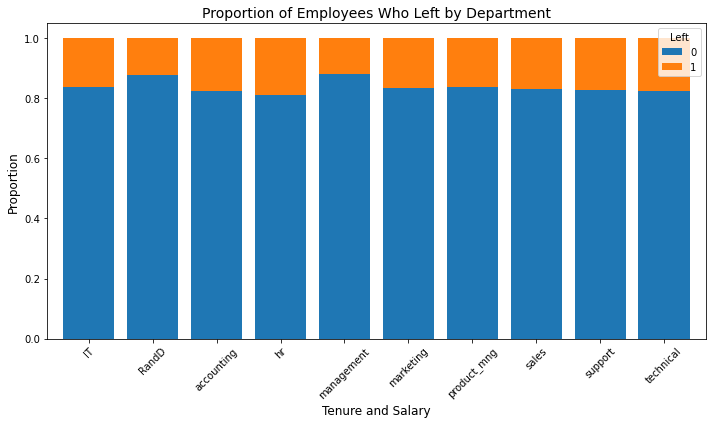

In [31]:
# Create a plot as needed
### YOUR CODE HERE ###
proportion_df=df1.groupby(["department"])["left"].value_counts(normalize=True).unstack()
fig, ax = plt.subplots(figsize=(10, 6))
proportion_df.plot(kind='bar', stacked=True, ax=ax, width=0.8)
ax.set_title('Proportion of Employees Who Left by Department', fontsize=14)
ax.set_xlabel('Tenure and Salary', fontsize=12)
ax.set_ylabel('Proportion', fontsize=12)
ax.legend(title='Left', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

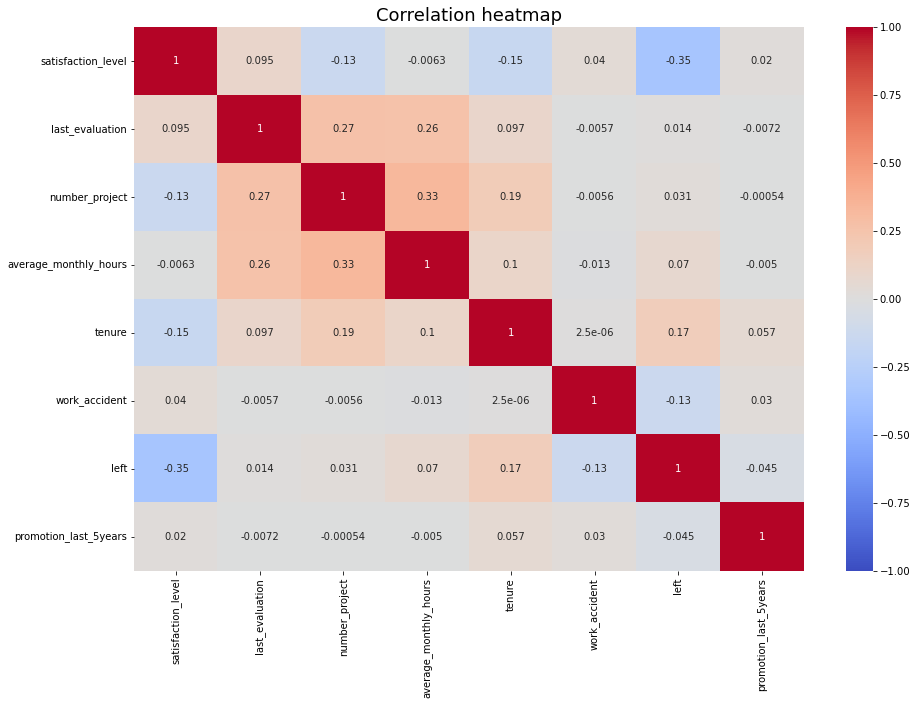

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show();

In [33]:
# Check outliers for all columns
def find_outliers_bycolumn(column):
    percentile25 = column.quantile(0.25)
    percentile75 = column.quantile(0.75)
    iqr=percentile75 - percentile25
    upper_limit = percentile75 + 1.5*iqr
    lower_limit = percentile25 - 1.5*iqr
    outliers_up = (column > upper_limit).sum()
    outliers_low = (column < lower_limit).sum()
    return outliers_up, upper_limit, outliers_low, lower_limit

# Create a table summarizing outliers for each column
outlier_summary = []

# Iterate over columns in the DataFrame
for column_name in df1.columns:
    if pd.api.types.is_numeric_dtype(df1[column_name]):  # Only process numeric columns
        outliers_up, upper_limit, outliers_low, lower_limit = find_outliers_bycolumn(df1[column_name])
        outlier_summary.append({
            "column_name": column_name,
            "outliers_up": outliers_up,
            "upper_limit": upper_limit,
            "outliers_low": outliers_low,
            "lower_limit": lower_limit
        })

# Convert the summary to a DataFrame
outlier_table = pd.DataFrame(outlier_summary)

# Display the table
print(outlier_table)


             column_name  outliers_up  upper_limit  outliers_low  lower_limit
0     satisfaction_level            0        1.330             0       -0.030
1        last_evaluation            0        1.295             0        0.135
2         number_project            0        8.000             0        0.000
3  average_monthly_hours            0      372.000             0       28.000
4                 tenure          824        5.500             0        1.500
5          work_accident         1850        0.000             0        0.000
6                   left         1991        0.000             0        0.000
7  promotion_last_5years          203        0.000             0        0.000


### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Outcome is categorical binary ("left" 1 or 0)

Observation independent: yes, each row is a different person

Multicollinearity: highest correlation is 0.33, between number of hours worked and number of projects, this <0.7 and thus does not violate assumption

Outliers: only "tenure" has outliers, 824 above upper limit of 5.5 years. From plots above it appears that peak of "left" is around 5 years, then above 6 years the rate of "left" decreases. Removing outliers will be needed for logist regression, but may impact the model performance not to see those employee with 6+ years tenure. 

Linear relationship of each X and logit: will be checked after model creation

Also: no missing data -> which was already addressed

In [34]:
# FINAL PREPARATION OF DATAFRAME BEFORE MODELING

# Encode the categorical variables
df_enc=df1.copy()
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)
df_enc = pd.get_dummies(df_enc, drop_first=True, columns=["department"])

df_enc.head()

# df_enc still containes outliers

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [35]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_monthly_hours   11991 non-null  int64  
 4   tenure                  11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5years   11991 non-null  int64  
 8   salary                  11991 non-null  int8   
 9   department_RandD        11991 non-null  uint8  
 10  department_accounting   11991 non-null  uint8  
 11  department_hr           11991 non-null  uint8  
 12  department_management   11991 non-null  uint8  
 13  department_marketing    11991 non-null  uint8  
 14  department_product_mng  11991 non-null

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Categorical binary outcome

### Identify the types of models most appropriate for this task.

Logistic regression

### Modeling

Add as many cells as you need to conduct the modeling process.

In [36]:
# Splitting data strategy:
# Since plan is to use both logistic regression (which cannot have outliers) and other ML (which instead can),
# let's split to X_train, X_val, X_test datasets, then only for logistic regression the X_train will have outliers removed

# Define X dataset
X = df_enc.drop(columns=["left"])
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0


In [37]:
# Define y dataset
y = df_enc["left"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [38]:
y.value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [39]:
# Split the data
# Since the proportion of "left" is not 50-50% but rather 90-10%, we need to use stratify
# Splitting 20% of data for "test" dataset
X_temp_train, X_test, y_temp_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [40]:
# Split further 20% for "validation" dataset
X_train, X_val, y_train, y_val = train_test_split(X_temp_train, y_temp_train, test_size=0.20, stratify=y_temp_train, random_state=42)

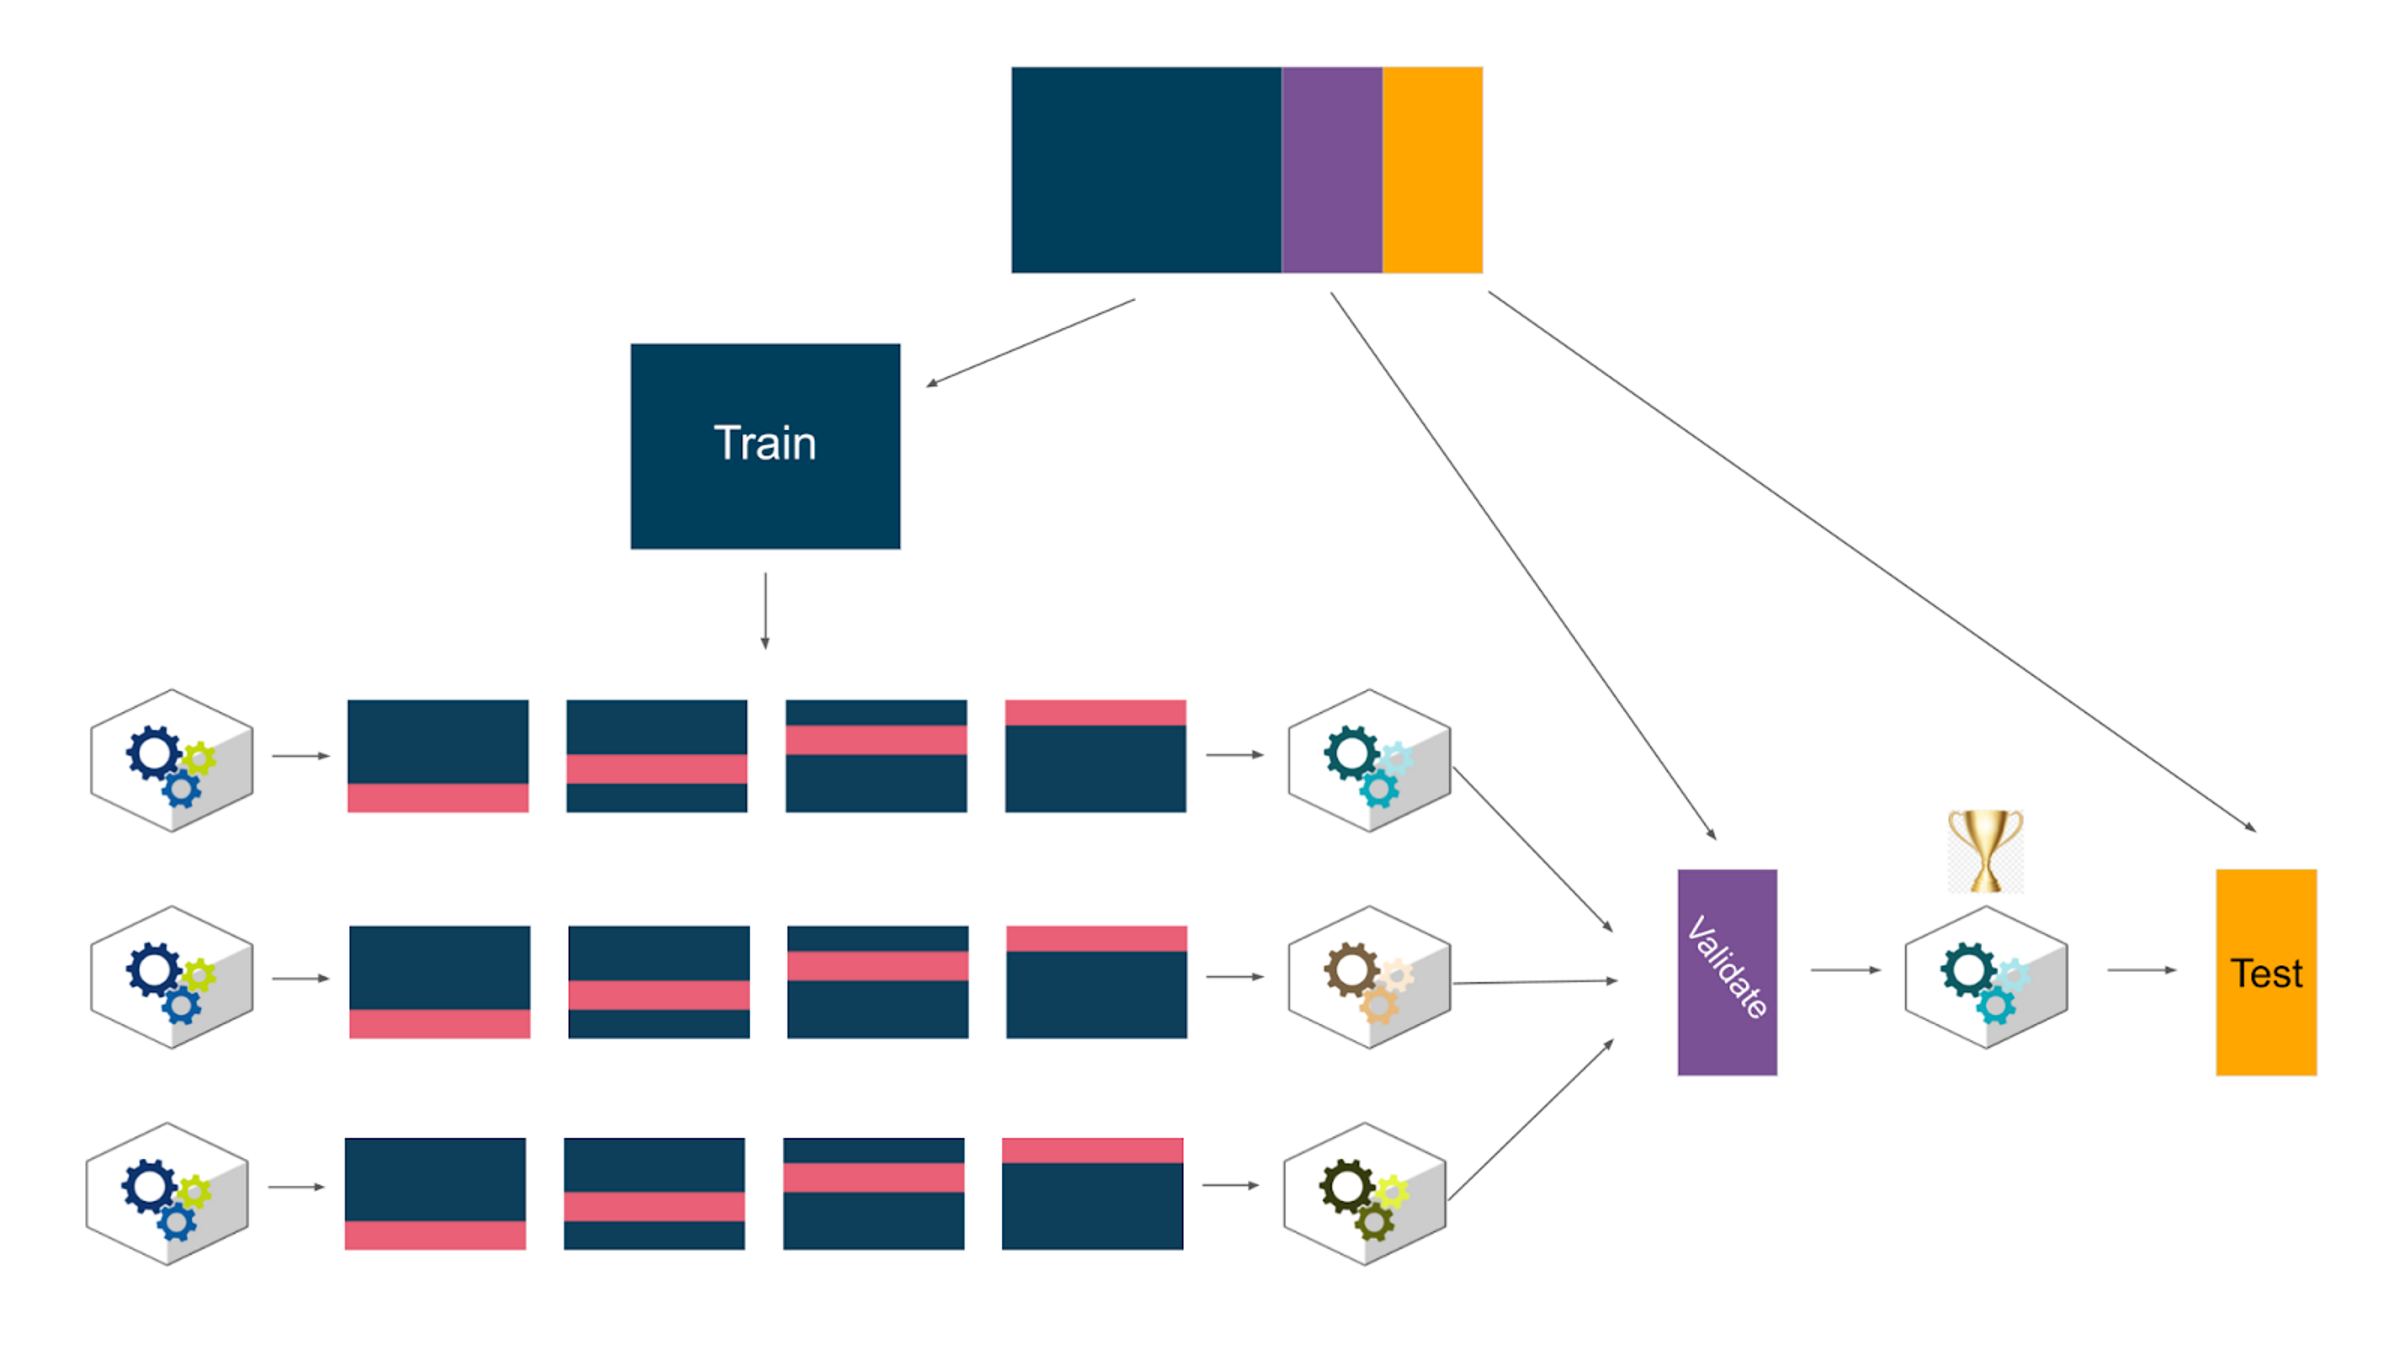

In [41]:
for name, dataset in zip(["X_train", "X_val", "X_test", "y_train", "y_val", "y_test"], [X_train, X_val, X_test, y_train, y_val, y_test]):
    print(f"{name} size: {len(dataset)}")

for dataset in zip([y_train, y_val, y_test]):
    values, counts = np.unique(dataset, return_counts=True)
    print(f"Values: {values} Counts: {counts} Proportions: {counts / counts.sum()}")
# This confirms that train, val and test set have same proportions of left employees (roughly 16%)

X_train size: 7673
X_val size: 1919
X_test size: 2399
y_train size: 7673
y_val size: 1919
y_test size: 2399
Values: [0 1] Counts: [6399 1274] Proportions: [0.83396325 0.16603675]
Values: [0 1] Counts: [1600  319] Proportions: [0.83376759 0.16623241]
Values: [0 1] Counts: [2001  398] Proportions: [0.83409754 0.16590246]


# Logistic regression (Model1)

In [42]:
# for the logistic regression we'll remove the outliers
print(f"X_train size: {len(X_train)}")
print(f"y_train size: {len(y_train)}")
outliers_up, upper_limit, outliers_low, lower_limit = find_outliers_bycolumn(X_train["tenure"])
print(f"Total outliers up: {outliers_up}")

# Create a mask for non-outliers
non_outlier_mask = (X_train['tenure'] >= lower_limit) & (X_train['tenure'] <= upper_limit)
X_train_no_outliers = X_train[non_outlier_mask]
y_train_no_outliers = y_train[non_outlier_mask]
print(f"X_train_no_outliers size: {len(X_train_no_outliers)}")
print(f"y_train_no_outliers size: {len(y_train_no_outliers)}")

# from 7673 records - 541 outliers = 7132 records
# So logist regression will train on 7% less data than other models

X_train size: 7673
y_train size: 7673
Total outliers up: 541
X_train_no_outliers size: 7132
y_train_no_outliers size: 7132


In [43]:
%%time
# Build the logistic regression classifier
logreg_clf = LogisticRegression(penalty="none", max_iter=400).fit(X_train_no_outliers, y_train_no_outliers)

CPU times: user 18.3 s, sys: 24.7 s, total: 43 s
Wall time: 21.5 s


In [44]:
logreg_clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
# Printing model intercept
print(f"Intercept: {logreg_clf.intercept_}")

Intercept: [-1.17351658]


In [46]:
# Printing model coefficients with corresponding column
print("Feature coefficients:")
df_logreg_coefficients = []
for name, coef in zip(X_train.columns, logreg_clf.coef_.flatten()):
    df_logreg_coefficients.append({
        "Feature":name,
        "Coefficient":coef
    })

df_logreg_coefficients = pd.DataFrame(df_logreg_coefficients)
df_logreg_coefficients.sort_values(by=["Coefficient"], ascending=False)  

Feature coefficients:


,Feature,Coefficient
4,tenure,1.018161
16,department_technical,0.119627
14,department_sales,0.109498
10,department_hr,0.063984
9,department_accounting,0.057349
3,average_monthly_hours,0.003515
11,department_management,-0.026332
15,department_support,-0.066263
1,last_evaluation,-0.080086
12,department_marketing,-0.103415


Strongest factors seem to be:
- tenure 
(higher = higher risk of leaving)
In line with plots above: 5 years of tenure are much more likely to leave compared to 1-2 years

- satisfaction level 
(lower = higher risk of leaving)
In line with plots above

- work accident 
(lower = higher risk of leaving)
In line with plots above, people with accident have lower proportion of left

In [150]:
%%time
# Now that model is built, can test it agains the validation dataset
y_pred = logreg_clf.predict(X_val)

CPU times: user 0 ns, sys: 30.4 ms, total: 30.4 ms
Wall time: 2.34 ms


In [48]:
print("Accuracy:", "%.6f" % accuracy_score(y_val, y_pred))
print("Precision:", "%.6f" % precision_score(y_val, y_pred))
print("Recall:", "%.6f" % recall_score(y_val, y_pred))
print("F1 Score:", "%.6f" % f1_score(y_val, y_pred))

# NOTE: these values are only for the predicted left=1, which is the minority of data

Accuracy: 0.791558
Precision: 0.329114
Recall: 0.244514
F1 Score: 0.280576


In [49]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_val, y_pred, target_names=target_names))

# This metric shows precision and recall by class, so it's visible that e.g. precision is much higher for left=0
# can get the weighted average with command precision_score(y_val, y_pred, average='weighted')

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.90      0.88      1600
    Predicted would leave       0.33      0.24      0.28       319

                 accuracy                           0.79      1919
                macro avg       0.59      0.57      0.58      1919
             weighted avg       0.77      0.79      0.78      1919



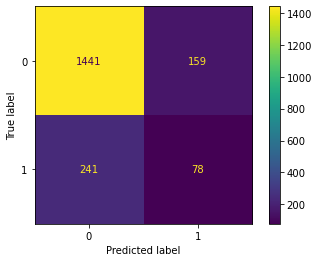

In [50]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred, labels=logreg_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=logreg_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [51]:
# Check assumption of linear relationship with logit
# Start by getting the raw data on predicted probabilities
training_probabilities=logreg_clf.predict_proba(X_train_no_outliers)
training_probabilities

array([[0.76380844, 0.23619156],
       [0.9880144 , 0.0119856 ],
       [0.96015879, 0.03984121],
       ...,
       [0.78418789, 0.21581211],
       [0.97632498, 0.02367502],
       [0.85386022, 0.14613978]])

In [52]:
X_train_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7132 entries, 10912 to 7215
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      7132 non-null   float64
 1   last_evaluation         7132 non-null   float64
 2   number_project          7132 non-null   int64  
 3   average_monthly_hours   7132 non-null   int64  
 4   tenure                  7132 non-null   int64  
 5   work_accident           7132 non-null   int64  
 6   promotion_last_5years   7132 non-null   int64  
 7   salary                  7132 non-null   int8   
 8   department_RandD        7132 non-null   uint8  
 9   department_accounting   7132 non-null   uint8  
 10  department_hr           7132 non-null   uint8  
 11  department_management   7132 non-null   uint8  
 12  department_marketing    7132 non-null   uint8  
 13  department_product_mng  7132 non-null   uint8  
 14  department_sales        7132 non-nul

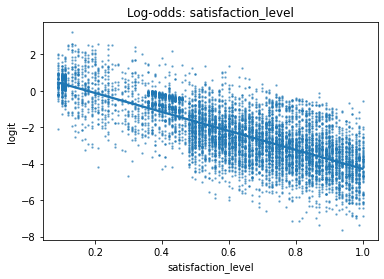

In [53]:
# 1. Copy the X_train dataframe
logit_data=X_train_no_outliers.copy()
# 2. Create a new `logit` column in the `logit_data` df
logit_data["logit"]=[np.log(prob[1] / prob[0]) for prob in training_probabilities]

# Plot regplot of `satisfaction_level` log-odds
sns.regplot(x='satisfaction_level', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: satisfaction_level');


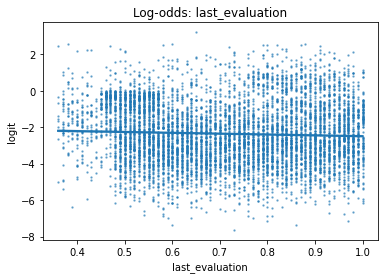

In [54]:
# Plot regplot of `last_evaluation` log-odds
sns.regplot(x='last_evaluation', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: last_evaluation');

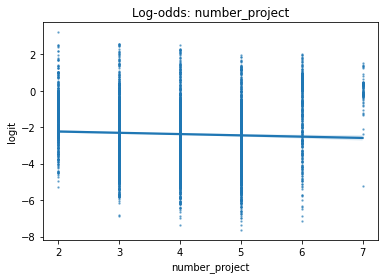

In [55]:
# Plot regplot of `number_project` log-odds
sns.regplot(x='number_project', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: number_project');

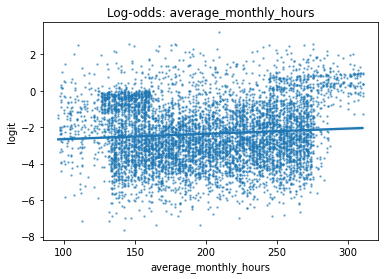

In [56]:
# Plot regplot of `average_monthly_hours` log-odds
sns.regplot(x='average_monthly_hours', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: average_monthly_hours');

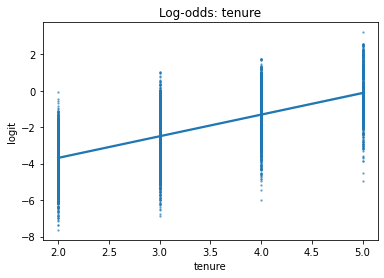

In [57]:
# Plot regplot of `tenure` log-odds
sns.regplot(x='tenure', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: tenure');

All assumptions are now confirmed, we can save the model results

In [151]:
%%time
# We also want to record what was the performance of logreg on train data
y_pred_train = logreg_clf.predict(X_train_no_outliers)

CPU times: user 3.11 ms, sys: 7.28 ms, total: 10.4 ms
Wall time: 1.64 ms


In [152]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_train_no_outliers, y_pred_train, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      5933
    Predicted would leave       0.47      0.25      0.32      1199

                 accuracy                           0.83      7132
                macro avg       0.66      0.59      0.61      7132
             weighted avg       0.79      0.83      0.80      7132



In [153]:
def model_results_to_df(model_name:str, accuracy, precision, recall, f1, time_to_fit, time_to_pred):
    df = pd.DataFrame([{'model': model_name,
                              'accuracy': accuracy,
                              'precision': precision,
                              'recall': recall,
                              'F1': f1,
                        'time_to_fit': time_to_fit,
                        'time_to_pred': time_to_pred
                             }])
    return df
model_results = model_results_to_df("LogReg X_train", accuracy_score(y_train_no_outliers, y_pred_train),
                                    precision_score(y_train_no_outliers, y_pred_train, average='weighted'),
                                   recall_score(y_train_no_outliers, y_pred_train, average='weighted'),
                                    f1_score(y_train_no_outliers, y_pred_train),
                                    43,
                                    0.08
                                   )
model_results

,model,accuracy,precision,recall,F1,time_to_fit,time_to_pred
0,LogReg X_train,0.826136,0.794693,0.826136,0.321663,43,0.08


In [154]:
model_results_logregXval=model_results_to_df("LogReg X_val", accuracy_score(y_val, y_pred),
                                    precision_score(y_val, y_pred, average='weighted'),
                                   recall_score(y_val, y_pred, average='weighted'),
                                    f1_score(y_val, y_pred),
                                             43,
                                             0.03
                                   )
model_results=pd.concat([model_results,model_results_logregXval], axis=0)
model_results

,model,accuracy,precision,recall,F1,time_to_fit,time_to_pred
0,LogReg X_train,0.826136,0.794693,0.826136,0.321663,43,0.08
0,LogReg X_val,0.791558,0.769013,0.791558,0.280576,43,0.03


# Gaussian Naive (Model2)

In [155]:
# Let's now use the X_train data to build a new model based on Gaussian naive

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()


In [156]:
%%time
gnb.fit(X_train, y_train)

CPU times: user 5.09 ms, sys: 8 µs, total: 5.09 ms
Wall time: 4.54 ms


GaussianNB(priors=None, var_smoothing=1e-09)

In [157]:
%%time
y_pred_train = gnb.predict(X_train)

CPU times: user 3.35 ms, sys: 19 µs, total: 3.37 ms
Wall time: 2.65 ms


In [158]:
print("Accuracy:", "%.6f" % accuracy_score(y_train, y_pred_train))
print("Precision:", "%.6f" % precision_score(y_train, y_pred_train))
print("Recall:", "%.6f" % recall_score(y_train, y_pred_train))
print("F1 Score:", "%.6f" % f1_score(y_train, y_pred_train))

Accuracy: 0.825492
Precision: 0.481586
Recall: 0.667190
F1 Score: 0.559395


In [159]:
model_results_GBXtrain=model_results_to_df("GaussNaive X_train", accuracy_score(y_train, y_pred_train),
                                    precision_score(y_train, y_pred_train),
                                   recall_score(y_train, y_pred_train),
                                    f1_score(y_train, y_pred_train),
                                             0.005,
                                             0.004
                                   )
model_results=pd.concat([model_results,model_results_GBXtrain], axis=0)
model_results

,model,accuracy,precision,recall,F1,time_to_fit,time_to_pred
0,LogReg X_train,0.826136,0.794693,0.826136,0.321663,43.000,0.080
0,LogReg X_val,0.791558,0.769013,0.791558,0.280576,43.000,0.030
0,GaussNaive X_train,0.825492,0.481586,0.667190,0.559395,0.005,0.004


In [160]:
%%time
y_pred_val = gnb.predict(X_val)

CPU times: user 2.13 ms, sys: 12 µs, total: 2.14 ms
Wall time: 1.58 ms


In [161]:
print("Accuracy:", "%.6f" % accuracy_score(y_val, y_pred_val))
print("Precision:", "%.6f" % precision_score(y_val, y_pred_val))
print("Recall:", "%.6f" % recall_score(y_val, y_pred_val))
print("F1 Score:", "%.6f" % f1_score(y_val, y_pred_val))

Accuracy: 0.830641
Precision: 0.492718
Recall: 0.636364
F1 Score: 0.555404


In [162]:
model_results_GBXval=model_results_to_df("GaussNaive X_val", accuracy_score(y_val, y_pred_val),
                                    precision_score(y_val, y_pred_val),
                                   recall_score(y_val, y_pred_val),
                                    f1_score(y_val, y_pred_val),
                                             0.005,
                                             0.002
                                   )
model_results=pd.concat([model_results,model_results_GBXval], axis=0)
model_results

,model,accuracy,precision,recall,F1,time_to_fit,time_to_pred
0,LogReg X_train,0.826136,0.794693,0.826136,0.321663,43.000,0.080
0,LogReg X_val,0.791558,0.769013,0.791558,0.280576,43.000,0.030
0,GaussNaive X_train,0.825492,0.481586,0.667190,0.559395,0.005,0.004
0,GaussNaive X_val,0.830641,0.492718,0.636364,0.555404,0.005,0.002


# Decision Tree (Model3)

In [163]:
# Let's now use a Decision Tree model
# GridSearch to test different hyperparameters
# Crossvalidation approach with 5 folds
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
decision_tree = DecisionTreeClassifier(random_state=0)
tree_params = {'max_depth':[2,3,4,5,10,20,50],
             'min_samples_leaf': [2,3,4,5,10,20,50]}
scoring = {'accuracy', 'precision', 'recall', 'f1'}
grid_classifier_dt = GridSearchCV(decision_tree, 
                   tree_params, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

In [164]:
%%time
grid_classifier_dt.fit(X_train, y_train)

CPU times: user 3.68 s, sys: 5.51 ms, total: 3.69 s
Wall time: 3.69 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 10, 20, 50],
                         'min_samples_leaf': [2, 3, 4, 5, 10, 2

In [165]:
# See all generated models from GridSearchCV
cv_results = pd.DataFrame(grid_classifier_dt.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.004951,0.000177,0.003843,0.000109,2,2,"{'max_depth': 2, 'min_samples_leaf': 2}",0.231373,0.411765,0.431373,0.389764,0.219608,0.336776,0.091889,43,0.872313,0.885993,0.886645,0.8794,0.870274,0.878925,0.006758,43,1.0,0.807692,0.791367,0.767442,1.0,0.8733,0.104239,36,0.375796,0.545455,0.558376,0.516971,0.360129,0.471345,0.085612,43
1,0.004852,0.000085,0.003894,0.000424,2,3,"{'max_depth': 2, 'min_samples_leaf': 3}",0.231373,0.411765,0.431373,0.389764,0.219608,0.336776,0.091889,43,0.872313,0.885993,0.886645,0.8794,0.870274,0.878925,0.006758,43,1.0,0.807692,0.791367,0.767442,1.0,0.8733,0.104239,36,0.375796,0.545455,0.558376,0.516971,0.360129,0.471345,0.085612,43
2,0.007550,0.000570,0.005884,0.001069,2,4,"{'max_depth': 2, 'min_samples_leaf': 4}",0.231373,0.411765,0.431373,0.389764,0.219608,0.336776,0.091889,43,0.872313,0.885993,0.886645,0.8794,0.870274,0.878925,0.006758,43,1.0,0.807692,0.791367,0.767442,1.0,0.8733,0.104239,36,0.375796,0.545455,0.558376,0.516971,0.360129,0.471345,0.085612,43
3,0.004879,0.000084,0.003720,0.000067,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.231373,0.411765,0.431373,0.389764,0.219608,0.336776,0.091889,43,0.872313,0.885993,0.886645,0.8794,0.870274,0.878925,0.006758,43,1.0,0.807692,0.791367,0.767442,1.0,0.8733,0.104239,36,0.375796,0.545455,0.558376,0.516971,0.360129,0.471345,0.085612,43
4,0.004827,0.000063,0.003792,0.000041,2,10,"{'max_depth': 2, 'min_samples_leaf': 10}",0.231373,0.411765,0.431373,0.389764,0.219608,0.336776,0.091889,43,0.872313,0.885993,0.886645,0.8794,0.870274,0.878925,0.006758,43,1.0,0.807692,0.791367,0.767442,1.0,0.8733,0.104239,36,0.375796,0.545455,0.558376,0.516971,0.360129,0.471345,0.085612,43


In [166]:
cv_results.sort_values(by=["mean_test_f1"], ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
30,0.014466,0.000391,0.004030,0.000176,10,4,"{'max_depth': 10, 'min_samples_leaf': 4}",0.874510,0.917647,0.905882,0.921260,0.917647,0.907389,0.017240,21,0.976547,0.981759,0.980456,0.983051,0.982399,0.980842,0.002312,1,0.982379,0.970954,0.974684,0.975000,0.975000,0.975603,0.003717,1,0.925311,0.943548,0.939024,0.947368,0.945455,0.940141,0.007915,1
29,0.015023,0.000572,0.004578,0.000795,10,3,"{'max_depth': 10, 'min_samples_leaf': 3}",0.886275,0.921569,0.917647,0.925197,0.917647,0.913667,0.013981,14,0.972638,0.979153,0.981759,0.982399,0.983051,0.979800,0.003818,2,0.945607,0.951417,0.970954,0.967078,0.979079,0.962827,0.012450,10,0.914980,0.936255,0.943548,0.945674,0.947368,0.937565,0.011912,2
32,0.013901,0.000125,0.003931,0.000149,10,10,"{'max_depth': 10, 'min_samples_leaf': 10}",0.862745,0.917647,0.898039,0.921260,0.901961,0.900330,0.020777,31,0.973290,0.982410,0.979805,0.982399,0.979791,0.979539,0.003335,3,0.973451,0.975000,0.978632,0.970954,0.974576,0.974523,0.002490,2,0.914761,0.945455,0.936605,0.945455,0.936864,0.935828,0.011232,3
46,0.015390,0.000582,0.004124,0.000220,50,10,"{'max_depth': 50, 'min_samples_leaf': 10}",0.862745,0.917647,0.898039,0.921260,0.901961,0.900330,0.020777,31,0.973290,0.982410,0.979805,0.982399,0.979791,0.979539,0.003335,3,0.973451,0.975000,0.978632,0.970954,0.974576,0.974523,0.002490,2,0.914761,0.945455,0.936605,0.945455,0.936864,0.935828,0.011232,3
39,0.015116,0.000355,0.004206,0.000369,20,10,"{'max_depth': 20, 'min_samples_leaf': 10}",0.862745,0.917647,0.898039,0.921260,0.901961,0.900330,0.020777,31,0.973290,0.982410,0.979805,0.982399,0.979791,0.979539,0.003335,3,0.973451,0.975000,0.978632,0.970954,0.974576,0.974523,0.002490,2,0.914761,0.945455,0.936605,0.945455,0.936864,0.935828,0.011232,3


In [167]:
# Identifying the best estimator (highest F1, since we used refit=f1)
grid_classifier_dt.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [168]:
# Which is in fact the one with highest F1 of 0.94
grid_classifier_dt.best_score_

0.9401413894334711

In [169]:
# Parameters of best estimator
grid_classifier_dt.best_params_

{'max_depth': 10, 'min_samples_leaf': 4}

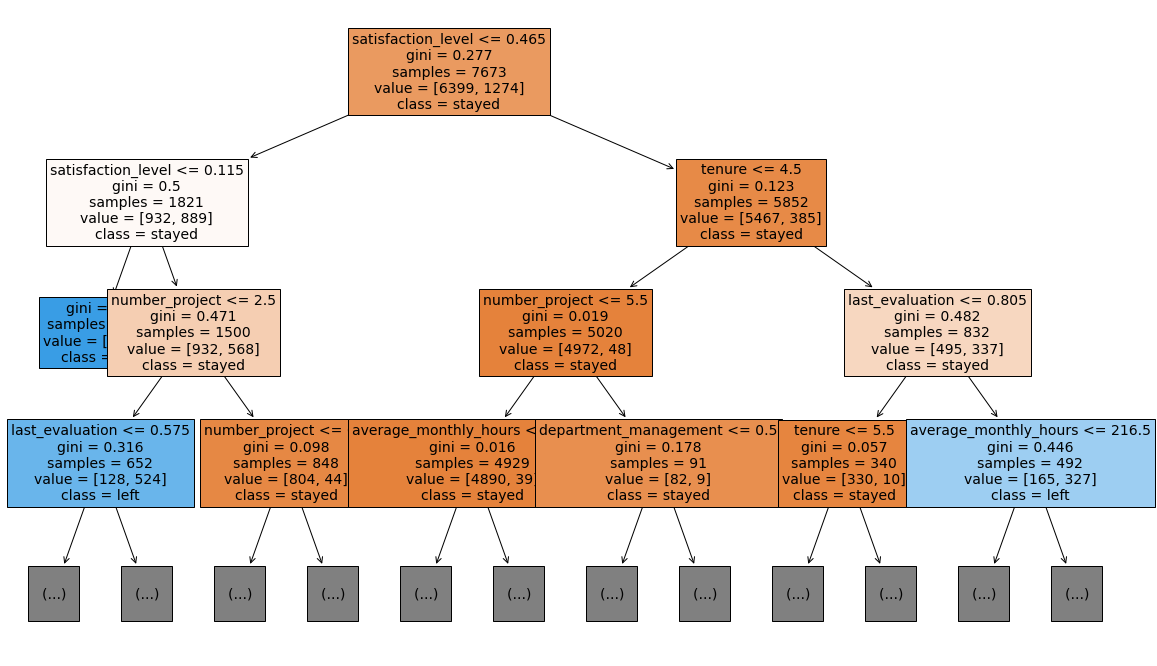

In [170]:
plt.figure(figsize=(20,12))
plot_tree(grid_classifier_dt.best_estimator_, max_depth=3, fontsize=14, feature_names=X_train.columns, class_names={0:'stayed', 1:'left'}, filled=True);

In [194]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(grid_classifier_dt.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
satisfaction_level,0.397876
number_project,0.240164
last_evaluation,0.171977
tenure,0.121553
average_monthly_hours,0.065066
work_accident,0.000826
department_technical,0.000522
department_management,0.000494
salary,0.000443
department_support,0.000430


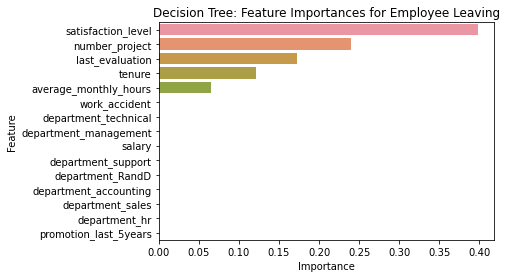

In [195]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

In [171]:
# Now save the scores obtained by best estimator during training as part of our model_results
best_index = grid_classifier_dt.best_index_ # to extract scores for the best estimator from the respective keys

# Access the training scores for the best estimator
cv_results = grid_classifier_dt.cv_results_

# Retrieve metrics for the best estimator
accuracy = cv_results['mean_test_accuracy'][best_index]
precision = cv_results['mean_test_precision'][best_index]
recall = cv_results['mean_test_recall'][best_index]
f1 = cv_results['mean_test_f1'][best_index]
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Accuracy: 0.9808424038833137
Precision: 0.9756033511551643
Recall: 0.9073892234058978
F1: 0.9401413894334711


In [172]:
model_results_DecisionTreeTrain=model_results_to_df("DecisionTree X_train", accuracy,
                                    precision,
                                   recall,
                                    f1,
                                             4,
                                             0.015)
model_results=pd.concat([model_results,model_results_DecisionTreeTrain], axis=0)
model_results

,model,accuracy,precision,recall,F1,time_to_fit,time_to_pred
0,LogReg X_train,0.826136,0.794693,0.826136,0.321663,43.000,0.080
0,LogReg X_val,0.791558,0.769013,0.791558,0.280576,43.000,0.030
0,GaussNaive X_train,0.825492,0.481586,0.667190,0.559395,0.005,0.004
0,GaussNaive X_val,0.830641,0.492718,0.636364,0.555404,0.005,0.002
0,DecisionTree X_train,0.980842,0.975603,0.907389,0.940141,4.000,0.015


In [173]:
%%time
# Now using the best Decision Tree model to predict the validation data
y_pred_val = grid_classifier_dt.best_estimator_.predict(X_val)

CPU times: user 1.84 ms, sys: 10 µs, total: 1.85 ms
Wall time: 1.28 ms


In [174]:
model_results_DecisionTreeXval=model_results_to_df("DecisionTree X_val", accuracy_score(y_val, y_pred_val),
                                    precision_score(y_val, y_pred_val),
                                   recall_score(y_val, y_pred_val),
                                    f1_score(y_val, y_pred_val),
                                             4,
                                             0.002
                                   )
model_results=pd.concat([model_results,model_results_DecisionTreeXval], axis=0)
model_results

,model,accuracy,precision,recall,F1,time_to_fit,time_to_pred
0,LogReg X_train,0.826136,0.794693,0.826136,0.321663,43.000,0.080
0,LogReg X_val,0.791558,0.769013,0.791558,0.280576,43.000,0.030
0,GaussNaive X_train,0.825492,0.481586,0.667190,0.559395,0.005,0.004
0,GaussNaive X_val,0.830641,0.492718,0.636364,0.555404,0.005,0.002
0,DecisionTree X_train,0.980842,0.975603,0.907389,0.940141,4.000,0.015
0,DecisionTree X_val,0.978114,0.951140,0.915361,0.932907,4.000,0.002


# Random forest (Model4)

In [131]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}
scoring = {'accuracy', 'precision', 'recall', 'f1'}
grid_classifier_rf = GridSearchCV(rf, 
                   rf_params, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

In [132]:
%%time
grid_classifier_rf.fit(X_train, y_train)

CPU times: user 30 s, sys: 139 ms, total: 30.2 s
Wall time: 30.2 s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [175]:
cv_results = pd.DataFrame(grid_classifier_rf.cv_results_)
cv_results.sort_values(by=["mean_test_f1"], ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
14,0.162410,0.001067,0.014477,0.000338,10,sqrt,0.9,1,0.01,50,"{'max_depth': 10, 'max_features': 'sqrt', 'max...",0.882353,0.917647,0.909804,0.913386,0.901961,0.905030,0.012454,1,0.977199,0.985016,0.983713,0.982399,0.982399,0.982145,0.002657,1,0.978261,0.991525,0.991453,0.978903,0.991379,0.986304,0.006309,7,0.927835,0.953157,0.948875,0.945010,0.944559,0.943887,0.008605,1
28,0.189535,0.008369,0.015810,0.000475,50,sqrt,0.9,1,0.001,50,"{'max_depth': 50, 'max_features': 'sqrt', 'max...",0.890196,0.925490,0.905882,0.897638,0.905882,0.905018,0.011788,2,0.979153,0.986319,0.982410,0.980443,0.982399,0.982145,0.002425,3,0.982684,0.991597,0.987179,0.982759,0.987179,0.986280,0.003323,8,0.934156,0.957404,0.944785,0.938272,0.944785,0.943880,0.007881,2
29,0.372141,0.002585,0.027532,0.001583,50,sqrt,0.9,1,0.001,100,"{'max_depth': 50, 'max_features': 'sqrt', 'max...",0.874510,0.925490,0.905882,0.901575,0.905882,0.902668,0.016344,4,0.977199,0.986319,0.983062,0.981095,0.983051,0.982145,0.002988,2,0.986726,0.991597,0.991416,0.982833,0.991416,0.988798,0.003505,1,0.927235,0.957404,0.946721,0.940452,0.946721,0.943707,0.009876,3
12,0.167900,0.000482,0.014756,0.000169,10,sqrt,0.9,1,0.001,50,"{'max_depth': 10, 'max_features': 'sqrt', 'max...",0.894118,0.917647,0.909804,0.893701,0.909804,0.905015,0.009510,3,0.979153,0.985016,0.982410,0.979140,0.983703,0.981884,0.002383,4,0.978541,0.991525,0.983051,0.978448,0.991453,0.984604,0.005863,11,0.934426,0.953157,0.945010,0.934156,0.948875,0.943125,0.007660,4
13,0.337264,0.002480,0.025676,0.001046,10,sqrt,0.9,1,0.001,100,"{'max_depth': 10, 'max_features': 'sqrt', 'max...",0.882353,0.925490,0.901961,0.893701,0.905882,0.901877,0.014295,5,0.977199,0.986319,0.981107,0.979791,0.982399,0.981363,0.003017,5,0.978261,0.991597,0.982906,0.982684,0.987179,0.984525,0.004523,12,0.927835,0.957404,0.940695,0.936082,0.944785,0.941360,0.009802,5


In [176]:
grid_classifier_rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=0.9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.01,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [177]:
grid_classifier_rf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.01,
 'n_estimators': 50}

In [178]:
# Now save the scores obtained by best estimator during training as part of our model_results
best_index = grid_classifier_rf.best_index_ # to extract scores for the best estimator from the respective keys

# Access the training scores for the best estimator
cv_results = grid_classifier_rf.cv_results_

# Retrieve metrics for the best estimator
accuracy = cv_results['mean_test_accuracy'][best_index]
precision = cv_results['mean_test_precision'][best_index]
recall = cv_results['mean_test_recall'][best_index]
f1 = cv_results['mean_test_f1'][best_index]
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Accuracy: 0.9821452505425343
Precision: 0.9863043097356696
Recall: 0.9050301065308013
F1: 0.9438871669681337


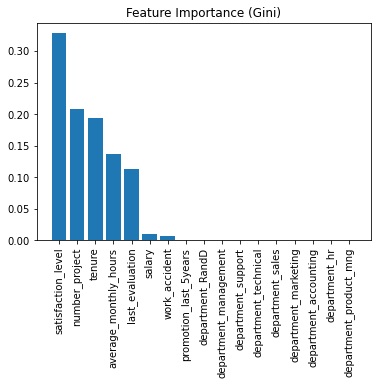

In [182]:
# Feature importance from the random forest
importances = grid_classifier_rf.best_estimator_.feature_importances_
feature_names = X_train.columns

# Sort and visualize feature importance
sorted_idx = np.argsort(importances)[::-1]
plt.bar(range(len(importances)), importances[sorted_idx])
plt.xticks(range(len(importances)), [feature_names[i] for i in sorted_idx], rotation=90)
plt.title("Feature Importance (Gini)")
plt.show()

In [179]:
model_results_RFTrain=model_results_to_df("RandomForest X_train", accuracy,
                                    precision,
                                   recall,
                                    f1,
                                             31,
                                             0.17)
model_results=pd.concat([model_results,model_results_RFTrain], axis=0)
model_results

,model,accuracy,precision,recall,F1,time_to_fit,time_to_pred
0,LogReg X_train,0.826136,0.794693,0.826136,0.321663,43.000,0.080
0,LogReg X_val,0.791558,0.769013,0.791558,0.280576,43.000,0.030
0,GaussNaive X_train,0.825492,0.481586,0.667190,0.559395,0.005,0.004
0,GaussNaive X_val,0.830641,0.492718,0.636364,0.555404,0.005,0.002
0,DecisionTree X_train,0.980842,0.975603,0.907389,0.940141,4.000,0.015
0,DecisionTree X_val,0.978114,0.951140,0.915361,0.932907,4.000,0.002
0,RandomForest X_train,0.982145,0.986304,0.905030,0.943887,31.000,0.170


In [180]:
%%time
# Now using the best Random Forest model to predict the validation data
y_pred_val = grid_classifier_rf.best_estimator_.predict(X_val)

CPU times: user 14.2 ms, sys: 19 µs, total: 14.2 ms
Wall time: 13.5 ms


In [181]:
model_results_RFXval=model_results_to_df("RandomForest X_val", accuracy_score(y_val, y_pred_val),
                                    precision_score(y_val, y_pred_val),
                                   recall_score(y_val, y_pred_val),
                                    f1_score(y_val, y_pred_val),
                                             31,
                                             0.015
                                   )
model_results=pd.concat([model_results,model_results_RFXval], axis=0)
model_results

,model,accuracy,precision,recall,F1,time_to_fit,time_to_pred
0,LogReg X_train,0.826136,0.794693,0.826136,0.321663,43.000,0.080
0,LogReg X_val,0.791558,0.769013,0.791558,0.280576,43.000,0.030
0,GaussNaive X_train,0.825492,0.481586,0.667190,0.559395,0.005,0.004
0,GaussNaive X_val,0.830641,0.492718,0.636364,0.555404,0.005,0.002
0,DecisionTree X_train,0.980842,0.975603,0.907389,0.940141,4.000,0.015
0,DecisionTree X_val,0.978114,0.951140,0.915361,0.932907,4.000,0.002
0,RandomForest X_train,0.982145,0.986304,0.905030,0.943887,31.000,0.170
0,RandomForest X_val,0.979677,0.976190,0.899687,0.936378,31.000,0.015


# XGBoost (Model5)

In [94]:
from xgboost import XGBClassifier
from xgboost import plot_importance
xgb = XGBClassifier(objective='binary:logistic', random_state=0)
xgb_params = {'max_depth': [6], 
             'min_child_weight': [3],
             'learning_rate': [0.1],
             'n_estimators': [50]
             }    
scoring = {'accuracy', 'precision', 'recall', 'f1'}
grid_classifier_xgb = GridSearchCV(xgb, 
                   xgb_params, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

In [95]:
%%time
grid_classifier_xgb.fit(X_train, y_train)

CPU times: user 8min 17s, sys: 505 ms, total: 8min 17s
Wall time: 4min 9s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                   

In [184]:
cv_results = pd.DataFrame(grid_classifier_xgb.cv_results_)
cv_results.sort_values(by=["mean_test_f1"], ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,params,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,43.446889,28.134297,0.219062,0.073478,0.1,6,3,50,"{'learning_rate': 0.1, 'max_depth': 6, 'min_ch...",0.886275,0.929412,0.901961,0.913386,0.905882,0.907383,0.014132,1,0.976547,0.985668,0.979805,0.981095,0.981095,0.980842,0.00293,1,0.969957,0.983402,0.974576,0.970711,0.978814,0.975492,0.005058,1,0.92623,0.955645,0.936864,0.941176,0.940937,0.94017,0.009448,1


In [185]:
grid_classifier_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [186]:
grid_classifier_xgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 50}

In [187]:
# Now save the scores obtained by best estimator during training as part of our model_results
best_index = grid_classifier_xgb.best_index_ # to extract scores for the best estimator from the respective keys

# Access the training scores for the best estimator
cv_results = grid_classifier_xgb.cv_results_

# Retrieve metrics for the best estimator
accuracy = cv_results['mean_test_accuracy'][best_index]
precision = cv_results['mean_test_precision'][best_index]
recall = cv_results['mean_test_recall'][best_index]
f1 = cv_results['mean_test_f1'][best_index]
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Accuracy: 0.9808419791989603
Precision: 0.9754921397502448
Recall: 0.907383047707272
F1: 0.940170309481451


In [188]:
model_results_XGBTrain=model_results_to_df("XGBoost X_train", accuracy,
                                    precision,
                                   recall,
                                    f1,
                                             497,
                                             43)
model_results=pd.concat([model_results,model_results_XGBTrain], axis=0)
model_results

,model,accuracy,precision,recall,F1,time_to_fit,time_to_pred
0,LogReg X_train,0.826136,0.794693,0.826136,0.321663,43.000,0.080
0,LogReg X_val,0.791558,0.769013,0.791558,0.280576,43.000,0.030
0,GaussNaive X_train,0.825492,0.481586,0.667190,0.559395,0.005,0.004
0,GaussNaive X_val,0.830641,0.492718,0.636364,0.555404,0.005,0.002
0,DecisionTree X_train,0.980842,0.975603,0.907389,0.940141,4.000,0.015
0,DecisionTree X_val,0.978114,0.951140,0.915361,0.932907,4.000,0.002
0,RandomForest X_train,0.982145,0.986304,0.905030,0.943887,31.000,0.170
0,RandomForest X_val,0.979677,0.976190,0.899687,0.936378,31.000,0.015
0,XGBoost X_train,0.980842,0.975492,0.907383,0.940170,497.000,43.000


In [189]:
%%time
# Now using the best XGBoost model to predict the validation data
y_pred_val = grid_classifier_xgb.best_estimator_.predict(X_val)

CPU times: user 493 ms, sys: 0 ns, total: 493 ms
Wall time: 139 ms


In [190]:
model_results_XGBXval=model_results_to_df("XGBoost X_val", accuracy_score(y_val, y_pred_val),
                                    precision_score(y_val, y_pred_val),
                                   recall_score(y_val, y_pred_val),
                                    f1_score(y_val, y_pred_val),
                                             497,
                                             0.001
                                   )
model_results=pd.concat([model_results,model_results_XGBXval], axis=0)
model_results

,model,accuracy,precision,recall,F1,time_to_fit,time_to_pred
0,LogReg X_train,0.826136,0.794693,0.826136,0.321663,43.000,0.080
0,LogReg X_val,0.791558,0.769013,0.791558,0.280576,43.000,0.030
0,GaussNaive X_train,0.825492,0.481586,0.667190,0.559395,0.005,0.004
0,GaussNaive X_val,0.830641,0.492718,0.636364,0.555404,0.005,0.002
0,DecisionTree X_train,0.980842,0.975603,0.907389,0.940141,4.000,0.015
0,DecisionTree X_val,0.978114,0.951140,0.915361,0.932907,4.000,0.002
0,RandomForest X_train,0.982145,0.986304,0.905030,0.943887,31.000,0.170
0,RandomForest X_val,0.979677,0.976190,0.899687,0.936378,31.000,0.015
0,XGBoost X_train,0.980842,0.975492,0.907383,0.940170,497.000,43.000
0,XGBoost X_val,0.983325,0.983165,0.915361,0.948052,497.000,0.001


# Selecting model champion

XGBoost proves to be the best performing model when tested with validation dataset
XGBoost is thus the model champion and will be used to predict test dataset

In [191]:
%%time
# Now using the best XGBoost model to predict the test data
y_pred_test = grid_classifier_xgb.best_estimator_.predict(X_test)

CPU times: user 375 ms, sys: 105 µs, total: 376 ms
Wall time: 60.5 ms


In [192]:
model_results_XGBXtest=model_results_to_df("XGBoost X_test", accuracy_score(y_test, y_pred_test),
                                    precision_score(y_test, y_pred_test),
                                   recall_score(y_test, y_pred_test),
                                    f1_score(y_test, y_pred_test),
                                             497,
                                             0.379
                                   )
model_results=pd.concat([model_results,model_results_XGBXtest], axis=0)
model_results

,model,accuracy,precision,recall,F1,time_to_fit,time_to_pred
0,LogReg X_train,0.826136,0.794693,0.826136,0.321663,43.000,0.080
0,LogReg X_val,0.791558,0.769013,0.791558,0.280576,43.000,0.030
0,GaussNaive X_train,0.825492,0.481586,0.667190,0.559395,0.005,0.004
0,GaussNaive X_val,0.830641,0.492718,0.636364,0.555404,0.005,0.002
0,DecisionTree X_train,0.980842,0.975603,0.907389,0.940141,4.000,0.015
0,DecisionTree X_val,0.978114,0.951140,0.915361,0.932907,4.000,0.002
0,RandomForest X_train,0.982145,0.986304,0.905030,0.943887,31.000,0.170
0,RandomForest X_val,0.979677,0.976190,0.899687,0.936378,31.000,0.015
0,XGBoost X_train,0.980842,0.975492,0.907383,0.940170,497.000,43.000
0,XGBoost X_val,0.983325,0.983165,0.915361,0.948052,497.000,0.001


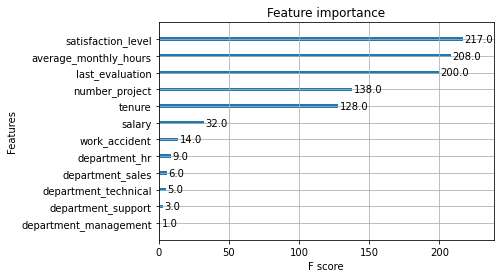

In [193]:
plot_importance(grid_classifier_xgb.best_estimator_)

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results


5 different models were tested, from regression technique, to supervised machine learning techniques:
Logistic regression
Gaussian Naive
Decision Tree
Random Forest
XGBoost

All models were trained on a training dataset, then evaluated against the same validation set.
The highest scores were obtained by XGBoost model for all enpoint: precision, recall, accuracy, F1.

The XGBoost champion model was then used to predict the test dataset with all scores >0.92

The identified top predictor for an employee to leave the company are:
satisfaction_level
average_monthly_hours
last_evaluation
number_project
tenure

These top contributors are identified also in Decision Tree and Random Forest.

### Conclusion, Recommendations, Next Steps

Reading the model results in conjunction with the plots in initial data analysis, possible areas of intervention are:
number of projects and monthly hours: avoid assigning more than 5 projects per employee
tenure: consider awarding promotion within the 5 year of tenure


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.